In [20]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [103]:
job_India = df[df['job_country'] == 'India'].copy()

In [104]:
job_India['job_posted_month'] = job_India['job_posted_date'].dt.strftime('%B')

In [105]:
job_India

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,"['powershell', 'python', 'sql', 'mysql', 'sql ...","{'cloud': ['databricks', 'azure'], 'databases'...",June
19,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Indeed,Full-time,False,India,2023-04-26 13:20:12,False,False,India,None,NaN,NaN,Bitwise Solutions,"['r', 'sql', 'python', 'scala', 'java', 'c++',...","{'analyst_tools': ['tableau'], 'libraries': ['...",April
29,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Exusia,Full-time,False,India,2023-03-26 13:16:20,False,False,India,None,NaN,NaN,Exusia,None,None,March
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc","['sql', 'python', 'databricks', 'power bi', 'e...","{'analyst_tools': ['power bi', 'excel', 'word'...",July
42,Senior Data Engineer,"Senior Data Engineer(Python)-1563,1637&1633","Chennai, Tamil Nadu, India",via HR Software For Growing Businesses | Fresh...,Full-time,False,India,2023-11-10 13:30:41,True,False,India,None,NaN,NaN,CESIT,"['python', 'sql', 'aws', 'pyspark', 'docker', ...","{'async': ['jira'], 'cloud': ['aws'], 'librari...",November
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785712,Data Engineer,India - Collections Analyst II,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Varite India Private Limited,"['excel', 'flow']","{'analyst_tools': ['excel'], 'other': ['flow']}",March
785715,Data Analyst,Amul Careers 2023 - Apply Online - Data Analys...,India,melalui Jobsleworld - Jobs In India - Job Vaca...,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Amul,None,None,March
785716,Software Engineer,Application Support Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,CompuGroup Medical,"['c#', 'sql']","{'programming': ['c#', 'sql']}",March
785718,Business Analyst,Senior Performance QA Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Diebold Nixdorf,None,None,March


In [106]:
job_pivot = job_India.pivot_table(
 index='job_posted_month',
 columns='job_title_short',
 aggfunc='size'
)

In [108]:
job_pivot.reset_index(inplace=True)
job_pivot.set_index('index')
job_pivot['month_no'] = pd.to_datetime(job_pivot['job_posted_month'], format = '%B').dt.month

In [111]:
job_pivot.set_index('level_0')

KeyError: "None of ['level_0'] are in the columns"

In [112]:
job_pivot.set_index('index', inplace= True)

In [113]:
job_pivot.set_index('level_0')

KeyError: "None of ['level_0'] are in the columns"

In [114]:
job_pivot.drop('month_no', axis=1, inplace=True, errors='ignore')


In [115]:
job_pivot

job_title_short,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
index,,,,,,,,,,,
0,April,170,32,418,1566,946,54,86,375,194,169
1,August,189,25,618,1407,1157,47,126,343,235,148
2,December,186,27,648,1464,1206,94,77,343,200,133
3,February,143,35,433,1631,932,42,94,313,165,157
4,January,175,31,628,2132,1444,70,127,448,269,192
5,July,142,25,457,1528,1123,54,75,359,204,155
6,June,146,26,367,1632,1129,41,66,427,238,125
7,March,116,37,422,1591,1005,34,96,351,194,180
8,May,103,14,278,1384,837,31,59,329,134,98


In [116]:
job_pivot.set_index('level_0')

KeyError: "None of ['level_0'] are in the columns"

<Axes: xlabel='index'>

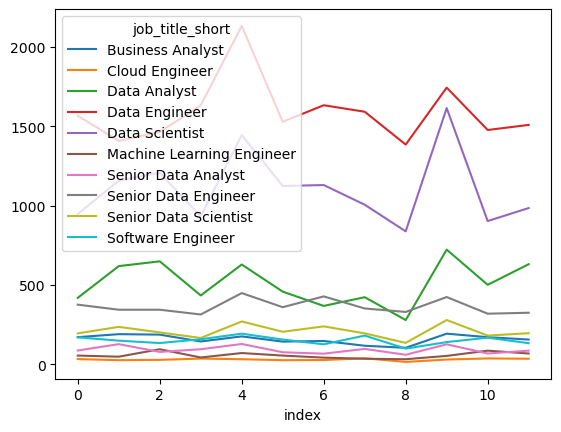

In [117]:
job_pivot.plot(kind='line')


In [118]:
top_3 = job_India['job_title_short'].value_counts().head(3)
top_3.index.to_list()

['Data Engineer', 'Data Scientist', 'Data Analyst']

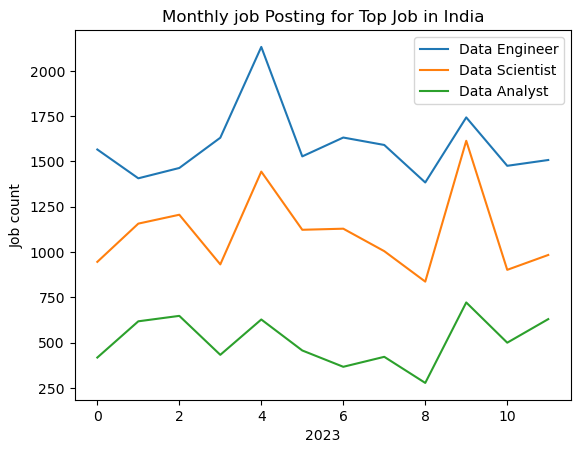

In [119]:
job_pivot[top_3.index.to_list()].plot(kind='line')
plt.title('Monthly job Posting for Top Job in India')
plt.xlabel('2023')
plt.ylabel('Job count')
plt.legend()
plt.show()